## SPAM Classification

### Introduction

Unstructured text is everywhere, such as emails, chat conversations, websites, and social media. Nevertheless, it’s hard to extract value from this data unless it’s organized in a certain way.

Doing so used to be a difficult and expensive process, since it required spending time and resources to manually sort the data.

Text classifiers with NLP have proven to be a great alternative to structure textual data in a fast, cost-effective, and scalable way.

Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In this particular project, we are classifying the text as Spam or Ham Using Natural Language Processing for:

1.SMS Spam Classification

2.Email Spam Classification

### 1. SMS Classification

##### Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

###### Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

###### Data:

Data is downloaded from: 

##### Technology

- Natural Language Processing
- Machine Learning

##### Packages

- Nltk (Natural Language toolkit)
- Scikit-Learn
- Pandas

##### Approach

1. Exploratory Data Analysis
2. Data Preprocessing
3. Text Cleaning
4. Removal of StopWords and Punctuations
5. Using WordNet Lemmatizer, lemmatized the words
6. Use of TF-IDF Vectorizer
7. Concept of Scikit-Learn Pipelining
8. Model trained using Naive-Bayes Classifer and SVM (Support Vector Machine)

##### Predicting on New Text

Machine Learning Model is able to classify whether the SMS is Spam or Ham, given a text :-

- Text = 'Congratulations, you have won a lottery of Dollar 5000. To Won Text on,555500 '
- Result :- Spam


##### Future Approach

Spam Classification using Deep Learning (RNN)

##### Importing Important Libraries

In [1]:
# Importing warnings code
import warnings
warnings.filterwarnings('ignore')

# Import important libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from collections import Counter

# Importing NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Importing Machine Learning Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##### Data Loading

In [2]:
# Loading data
sms_data = pd.read_csv(r'F:\Priya\Courses\Extra Projects\NLP\SMS\spam.csv', encoding='latin-1')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms_data = sms_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms_data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
sms_data.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)
sms_data.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
sms_data.shape

(5572, 2)

In [6]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
sms_data.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
sms_data.duplicated().sum()

403

In [9]:
sms_data = sms_data.drop_duplicates(keep='first')

In [10]:
sms_data.duplicated().sum()

0

##### EDA

In [11]:
sms_data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

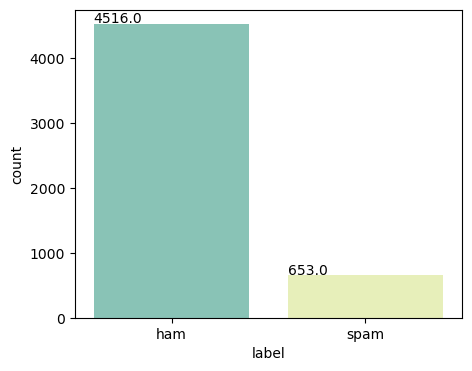

In [12]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='label', data=sms_data, palette= ["#7fcdbb", "#edf8b1"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

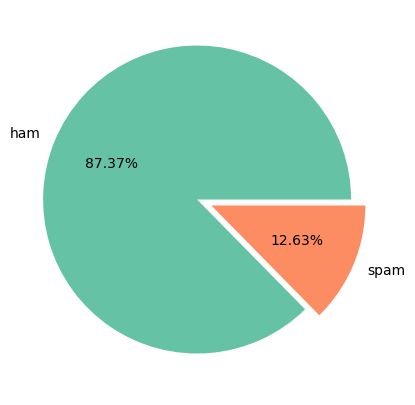

In [13]:
plt.figure(figsize=(7,5))
plt.pie(sms_data['label'].value_counts(), labels=['ham','spam'], autopct='%0.2f%%', colors=sns.color_palette('Set2'), explode=[0.05, 0.05])
# colors=['gold', 'cornflowerblue']
plt.show()

In [14]:
sms_data = sms_data.replace(['ham','spam'],[0, 1]) 
sms_data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
sms_data['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

##### Extracting Features
1. SMS/Message length
2. Total Words in SMS/Message
3. Total Sentences
4. Toatal Punctuations
5. Stopwords.


In [16]:
sms_data['message_length'] = sms_data['message'].apply(len)

# sms_data['message_length'] = 0
# for i in range(len(sms_data.message)):
#     sms_data.loc[i,'message_length'] = len(sms_data.loc[i,'message'])

In [17]:
sms_data.head()

,label,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# nltk.download('punkt')

In [19]:
sms_data['message_words_count'] = sms_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
sms_data['message_sentences'] = sms_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
punct = []
for msg in sms_data['message']:
    count = sum(1 for char in msg if char in string.punctuation)
    punct.append(count)
    
sms_data['message_punctuation'] = punct  

In [21]:
sms_data.head()

,label,message,message_length,message_words_count,message_sentences,message_punctuation
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,9
1,0,Ok lar... Joking wif u oni...,29,8,2,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,6
3,0,U dun say so early hor... U c already then say...,49,13,1,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,2


In [22]:
sms_data[sms_data['label']==0][['message_length','message_words_count','message_sentences', 'message_punctuation']].describe()

,message_length,message_words_count,message_sentences,message_punctuation
count,4516.000000,4516.000000,4516.000000,4516.00000
mean,70.459256,17.120903,1.799601,3.86581
std,56.358207,13.493725,1.278465,4.52126
min,2.000000,1.000000,1.000000,0.00000
25%,34.000000,8.000000,1.000000,1.00000
50%,52.000000,13.000000,1.000000,3.00000
75%,90.000000,22.000000,2.000000,5.00000
max,910.000000,220.000000,28.000000,133.00000


__Insight:__

| Insights Feature | HAM Message | SPAM Message |
|:---|---:|---:|
| Average length | 70 | 137 |
| Minimum characters | 2 | 13 |
| Maximum length | 910 | 224 |
| Average senteneces | 2 | 3 |
| Minimum sentences | 1 | 1 |
| Maximum sentences | 28 | 8 |
| Average words | 17 | 28 |
| Minimum words | 1 | 2 |
| Maximum words | 220 | 46 |

In [23]:
sms_data[sms_data['label']==1][['message_length','message_words_count','message_sentences', 'message_punctuation']].describe()

,message_length,message_words_count,message_sentences,message_punctuation
count,653.000000,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841,5.649311
std,30.137753,7.008418,1.483201,3.493353
min,13.000000,2.000000,1.000000,0.000000
25%,132.000000,25.000000,2.000000,3.000000
50%,149.000000,29.000000,3.000000,5.000000
75%,157.000000,32.000000,4.000000,8.000000
max,224.000000,46.000000,8.000000,26.000000


##### Histogram Plots 

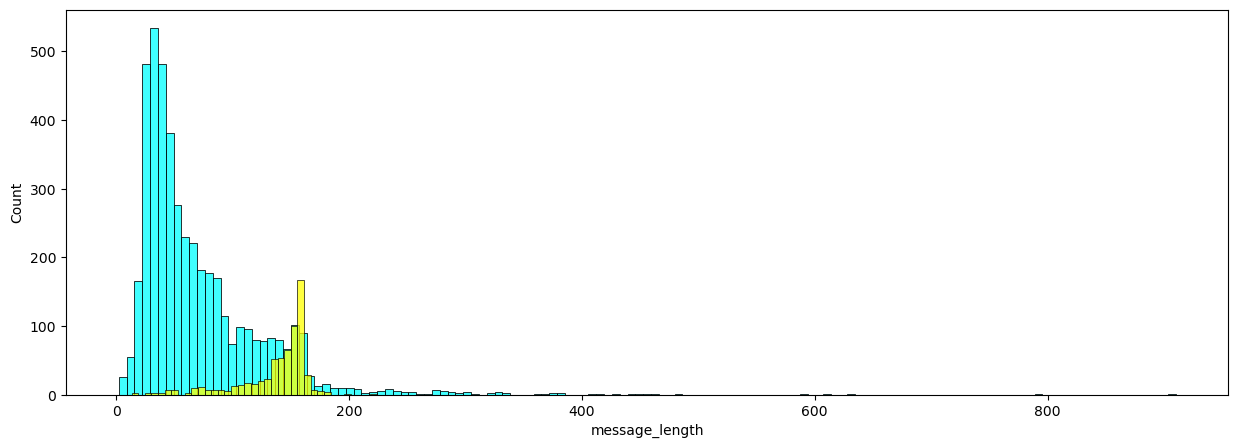

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(sms_data[sms_data['label']==0]['message_length'], color='cyan')
sns.histplot(sms_data[sms_data['label']==1]['message_length'], color='yellow')
plt.show()

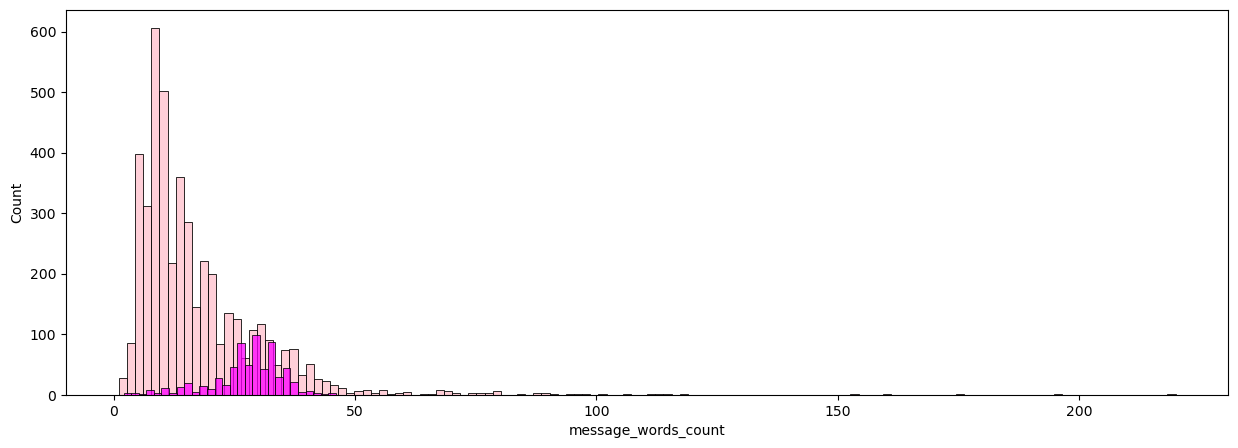

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(sms_data[sms_data['label']==0]['message_words_count'], color='pink')
sns.histplot(sms_data[sms_data['label']==1]['message_words_count'], color='magenta')
plt.show()

In [26]:
def message_word_count(data):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(30)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    print(most_count)
    
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x='Word',y='Count',data=most_count, palette='rainbow')
    plt.title('Count of Words')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()

    Word  Count
0     to   1972
1    you   1562
2      I   1375
3      a   1198
4    the   1114
5    and    814
6     in    731
7      i    720
8     is    691
9      u    614
10   for    604
11    my    579
12    me    532
13    of    531
14  your    517
15  have    447
16    on    446
17     2    423
18  that    407
19    it    376
20   are    371
21    be    349
22    at    341
23    or    335
24   not    320
25  with    316
26   get    313
27  call    310
28  will    301
29   can    291


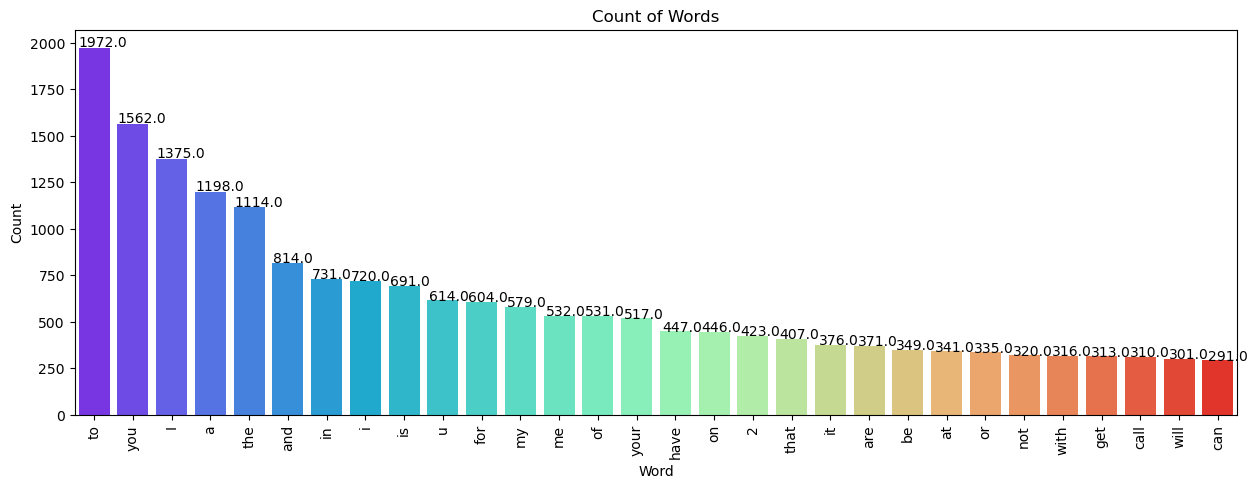

In [27]:
message_word_count(sms_data["message"])

In [28]:
# nltk.download('stopwords')

In [29]:
# nltk.download('wordnet')

In [30]:
# nltk.download('omw-1.4')

In [31]:
# corpus = []
# ps = PorterStemmer()

# for msg in sms_data['message']:
#     stem_msg = re.sub('[^a-zA-Z]', ' ', msg)
#     stem_msg = stem_msg.lower()
#     stem_msg = stem_msg.split()
#     stem_msg = [ps.stem(word) for word in stem_msg if not word in (stopwords.words('english') and string.punctuation)]
#     stem_msg = ' '.join(stem_msg)
#     corpus.append(stem_msg)

##### Removing Stopwords

In [32]:
def message_processed(text):
#    corpus = []
#    ps = PorterStemmer()
    lemma=WordNetLemmatizer() 
    # for msg in data_frame[text_column]:
    text = re.sub('[^a-zA-Z]', ' ', text)
#    text=re.sub("U", "you", text)
#    text=re.sub("R", "are", text)
    text = text.lower()
    
#    text=re.sub("s", "yes", text)
#    text=re.sub("ur", "your", text)
#    text=re.sub("wif", "with", text)
#    text=re.sub("wkly", "weekly", text)
#    text=re.sub("hor", "hour", text)
#    text=re.sub("comp", "competition", text)
#    text=re.sub("u'r", "you are", text)
#    text=re.sub("wanna", "wanted to", text)
#    text=re.sub("c", "see", text)
#    text=re.sub("gt", "great", text)
#    text=re.sub("gn", "good night", text)
#    text=re.sub("ge", "good evening", text)
#    text=re.sub("gm", "good morning", text)
#    text=re.sub("juzz", "just", text)
    
    text=text.replace('₹', ' rupee ')
    text=text.replace('%', ' percent')
    text=text.replace('$', ' dollar ')
    text=text.replace('€', ' euro ')
    text=text.replace('@', ' at ')
    
    text = text.split()
#    text = [ps.stem(word) for word in text if not word in (stopwords.words('english') and string.punctuation)]
    text = [lemma.lemmatize(word) for word in text if not word in (stopwords.words('english') and string.punctuation)]
    text = ' '.join(text)
##    data_frame['corpus'] = corpus
    return text

##### Cleaned Message/SMS

In [33]:
# sms_data = preprocess_text_column(sms_data, 'message')
# print(sms_data)

sms_data['message_cleaned'] = sms_data['message'].apply(lambda x: message_processed(x))
sms_data[['message', 'message_cleaned']].head(10)

,message,message_cleaned
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he go to usf he life around ...
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling it s been week s now...
6,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,As per your request 'Melle Melle (Oru Minnamin...,a per your request melle melle oru minnaminung...
8,WINNER!! As a valued network customer you have...,winner a a valued network customer you have be...
9,Had your mobile 11 months or more? U R entitle...,had your mobile month or more u r entitled to ...


In [34]:
# sms_data['corpus'] = corpus
# sms_data.head()

    Word  Count
0      i   2848
1    you   2146
2     to   2070
3      a   1467
4    the   1238
5      u   1141
6    and    929
7     it    897
8     in    830
9     is    793
10    me    754
11    my    687
12   for    661
13  your    623
14     s    567
15  that    567
16    of    560
17  call    539
18  have    538
19    on    493
20     t    475
21   are    466
22   now    450
23   can    446
24     m    441
25    so    440
26   but    420
27   not    412
28    we    393
29    or    387


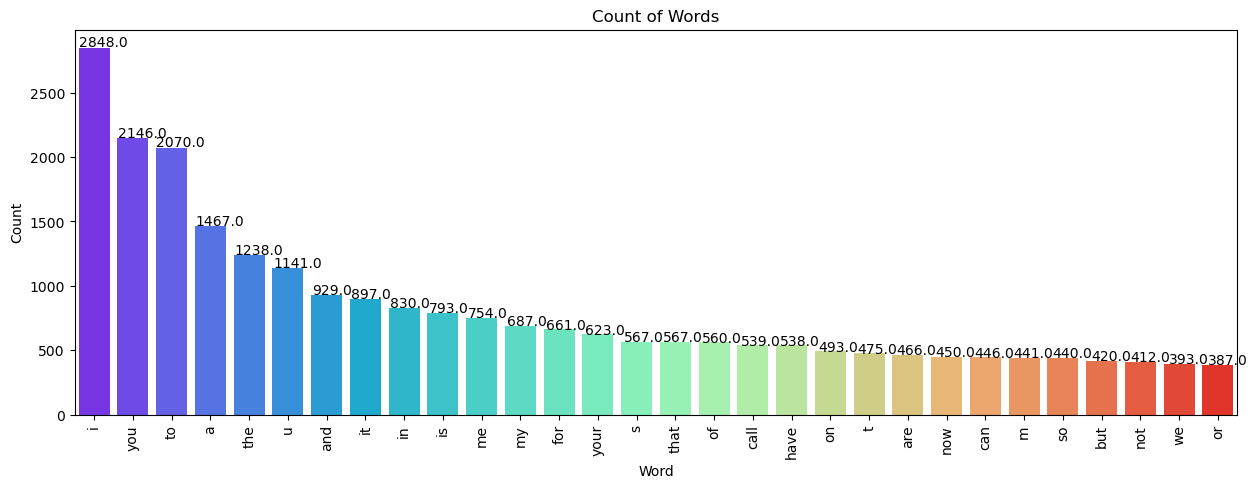

In [35]:
message_word_count(sms_data["message_cleaned"])

    Word  Count
0      i   2783
1    you   1876
2     to   1474
3      a   1096
4    the   1055
5      u    976
6     it    862
7    and    825
8     in    759
9     me    727
10    my    675
11    is    649
12  that    544
13     s    479
14    of    478
15   for    476
16  have    423
17    so    421
18   can    420
19   but    414
20     m    398
21   are    397
22   not    389
23     t    383
24  your    381
25    on    372
26    at    360
27    do    349
28    we    342
29    be    326


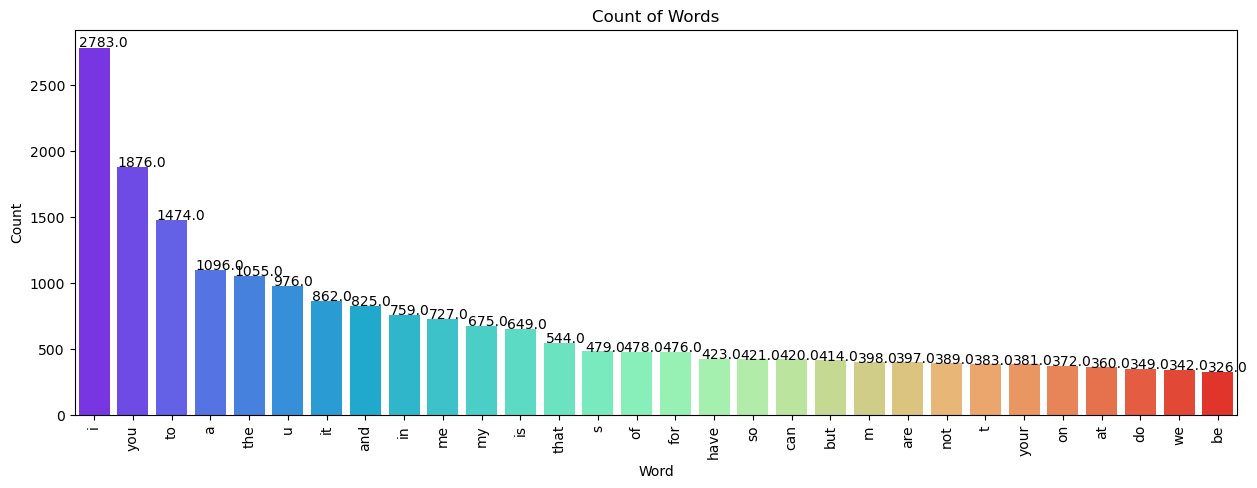

In [36]:
message_word_count(sms_data[sms_data["label"]==0]["message_cleaned"])

      Word  Count
0       to    596
1        a    371
2     call    339
3      you    270
4     your    242
5     free    197
6      for    185
7      the    183
8      now    168
9        u    165
10      or    160
11       p    158
12      is    144
13     txt    141
14    text    128
15    from    123
16  mobile    121
17      on    121
18      ur    119
19    have    115
20    stop    114
21     and    104
22   claim     98
23   reply     98
24    with     94
25       c     93
26       t     92
27       s     88
28   prize     85
29     www     83


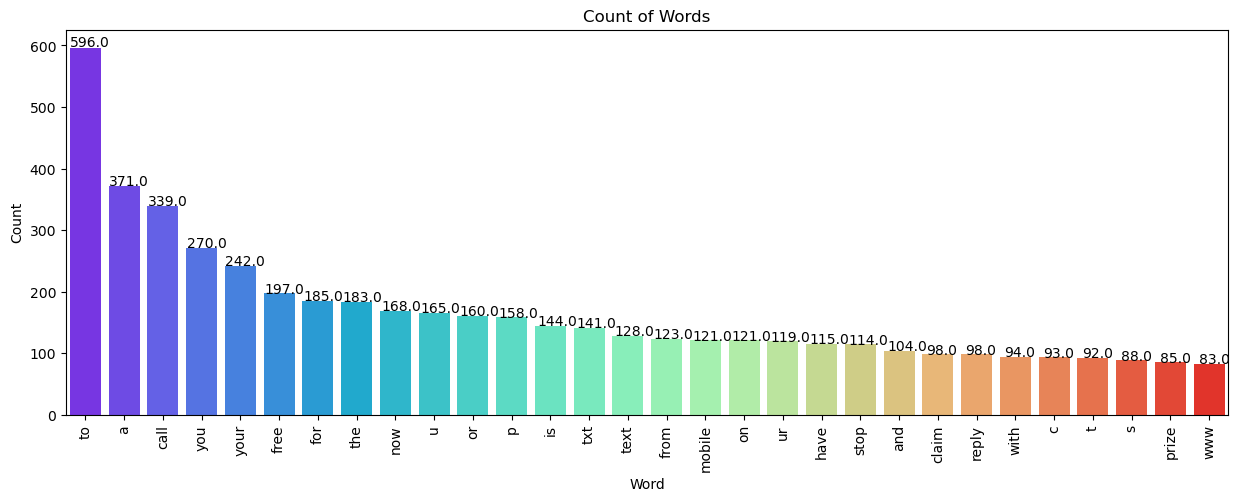

In [37]:
message_word_count(sms_data[sms_data["label"]==1]["message_cleaned"])

In [38]:
# def clean_text(text):
#     text = "".join([word.lower() for word in text if word not in string.punctuation])
#     tokens = re.findall('\S+', text)
#     # text = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
#     text = [WordNetLemmatizer().lemmatize(word) for word in tokens if word not in stopwords.words('english')]
#     return text

# # Apply function to body_text
# sms_data['cleaned_text'] = sms_data['message'].apply(lambda x: clean_text(x))
# sms_data[['message', 'cleaned_text']].head(10)

In [39]:
sms_data.head(3)

,label,message,message_length,message_words_count,message_sentences,message_punctuation,message_cleaned
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,9,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,2,6,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,6,free entry in a wkly comp to win fa cup final ...


##### Modeling

In [40]:
X = sms_data[['message', 'message_length', 'message_words_count', 'message_sentences', 'message_punctuation']]
# X = sms_data['message']

In [41]:
X.head()

,message,message_length,message_words_count,message_sentences,message_punctuation
0,"Go until jurong point, crazy.. Available only ...",111,24,2,9
1,Ok lar... Joking wif u oni...,29,8,2,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,6
3,U dun say so early hor... U c already then say...,49,13,1,6
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,2


In [42]:
y = sms_data['label']

In [43]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

##### Train-Test Split

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.33, random_state = 42)

In [45]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3463, 5)
X_test shape: (1706, 5)
y_train shape: (3463,)
y_test shape: (1706,)


In [46]:
X_train.head(3)

,message,message_length,message_words_count,message_sentences,message_punctuation
1942,K...k:)why cant you come here and search job:),46,15,1,7
818,Then why you not responding,27,5,1,0
1327,Ur balance is now å£500. Ur next question is: ...,126,32,4,8


In [47]:
X_test.head(3)

,message,message_length,message_words_count,message_sentences,message_punctuation
1617,Did u download the fring app?,29,7,1,1
2064,Pass dis to all ur contacts n see wat u get! R...,276,88,9,20
1272,Ok...,5,2,1,3


In [48]:
tfidf_vect = TfidfVectorizer()

# Assuming you have a list of text data called 'messages'
tfidf_vect = TfidfVectorizer(analyzer=message_processed)

# Use 'messages' to fit and transform the TfidfVectorizer
# tfidf_matrix = tfidf_vect.fit_transform(messages)
# tfidf_vect_fit = tfidf_vect.fit_transform(pd.concat([X_train['message'], X_test['message']], axis=0))
tfidf_train = tfidf_vect.fit_transform(X_train['message'])
# tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test['message'])

X_train = pd.concat([X_train[['message_length', 'message_words_count', 'message_sentences', 'message_punctuation']].reset_index(drop=True), pd.DataFrame(tfidf_train[:len(X_train)].toarray())], axis=1)
X_test = pd.concat([X_test[['message_length', 'message_words_count', 'message_sentences', 'message_punctuation']].reset_index(drop=True), pd.DataFrame(tfidf_test[len(X_train):].toarray())], axis=1)

In [49]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3463, 31)
X_test shape: (1706, 31)
y_train shape: (3463,)
y_test shape: (1706,)


##### Model Building

In [50]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(tfidf_train, y_train)
    
    y_train_pred=model.predict(tfidf_train)   
    y_test_pred = model.predict(tfidf_test)
    
    train_accuracy=round(accuracy_score(y_train, y_train_pred), 4)
    test_accuracy=round(accuracy_score(y_test, y_test_pred), 4)
    
#    accuracy = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)
    
    print(f"\n------ {name} ------")
    print()
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print()
    print(f"Test Accuracy: {test_accuracy:.4f}")
#    print()
#    print(f"Accuracy: {accuracy:.4f}")
    print()
    print(f"Classification Report:\n{report}")
    print()
    print(f"Confusion Matrix:\n{confusion}")



------ Logistic Regression ------

Train Accuracy: 0.9113

Test Accuracy: 0.9033

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1472
           1       0.87      0.35      0.50       234

    accuracy                           0.90      1706
   macro avg       0.89      0.67      0.72      1706
weighted avg       0.90      0.90      0.88      1706


Confusion Matrix:
[[1460   12]
 [ 153   81]]

------ Decision Tree ------

Train Accuracy: 1.0000

Test Accuracy: 0.9156

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1472
           1       0.70      0.68      0.69       234

    accuracy                           0.92      1706
   macro avg       0.82      0.81      0.82      1706
weighted avg       0.91      0.92      0.91      1706


Confusion Matrix:
[[1404   68]
 [  76  158]]

------ Random Forest ------

Train Accuracy: 1.

##### Hyperparameter Tunning

__Random Forest Model__

In [51]:
param_grid = {
    'n_estimators': [50, 100, 150],     # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(tfidf_train, y_train)

# Get the best model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Test the best model on the test set
y_test_pred = best_rf_model.predict(tfidf_test)

# Calculate and print metrics
train_accuracy=round(accuracy_score(y_train, y_train_pred), 4)
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print("\n------ Best Random Forest Model ------")
print()
print(f"Best Hyperparameters: {grid_search.best_params_}")
print()
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")
print()
print(f"Train Accuracy: {train_accuracy:.4f}")
print()
print(f"Test Accuracy: {accuracy:.4f}")
print()
print(f"Classification Report:\n{report}")
print()
print(f"Confusion Matrix:\n{confusion}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits

------ Best Random Forest Model ------

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Cross-Validated Accuracy: 0.9495

Train Accuracy: 1.0000

Test Accuracy: 0.9478

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1472
           1       0.96      0.65      0.77       234

    accuracy                           0.95      1706
   macro avg       0.95      0.82      0.87      1706
weighted avg       0.95      0.95      0.94      1706


Confusion Matrix:
[[1465    7]
 [  82  152]]


__Random Forest Model with best hyperparameters__

In [52]:
param_grid = {
    'n_estimators': [150],     # Number of trees in the forest
    'max_depth': [None],        # Maximum depth of the tree
    'min_samples_split': [2],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1]       # Minimum number of samples required to be at a leaf node
}

rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(tfidf_train, y_train)

# Get the best model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Test the best model on the test set
y_test_pred = best_rf_model.predict(tfidf_test)

# Calculate and print metrics
train_accuracy=round(accuracy_score(y_train, y_train_pred), 4)
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print("\n------ Best Random Forest Model ------")
print()
print(f"Best Hyperparameters: {grid_search.best_params_}")
print()
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")
print()
print(f"Train Accuracy: {train_accuracy:.4f}")
print()
print(f"Test Accuracy: {accuracy:.4f}")
print()
print(f"Classification Report:\n{report}")
print()
print(f"Confusion Matrix:\n{confusion}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits

------ Best Random Forest Model ------

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Best Cross-Validated Accuracy: 0.9448

Train Accuracy: 1.0000

Test Accuracy: 0.9496

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1472
           1       0.96      0.66      0.78       234

    accuracy                           0.95      1706
   macro avg       0.95      0.83      0.88      1706
weighted avg       0.95      0.95      0.95      1706


Confusion Matrix:
[[1465    7]
 [  79  155]]
